In [1]:
#pip install tensorflow

In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
img_array = cv2.imread("Dataset/Face_Mask/00000_Mask.jpg")

In [4]:
# install opencv-contrib-python

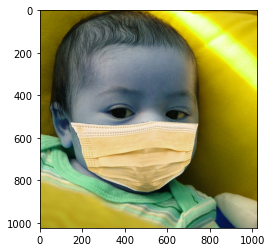

In [5]:
plt.imshow(img_array)

In [6]:
Datadirectory = 'Dataset/'
Classes = ['Face_Mask','No_Mask']

directory = 'data/'
clas = ['with_mask','without_mask']


In [7]:
img_size = 224

In [9]:
training_Data = []

def trainingData():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [10]:
trainingData()

In [11]:
len(training_Data)

1950

In [12]:
import random

random.shuffle(training_Data)

In [13]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,img_size, img_size, 3)

In [14]:
X.shape

(1950, 224, 224, 3)

In [15]:
X = X/255.0


In [17]:
Y = np.array(y)

In [19]:
model = tf.keras.applications.mobilenet.MobileNet()

In [20]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [21]:
base_input = model.layers[0].input

In [22]:
base_output = model.layers[-4].output

In [23]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [24]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [25]:
new_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [26]:
new_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
new_model.fit(X,Y, epochs = 2, validation_split=0.5)

Epoch 1/2
31/31 [==============================] - 186s 6s/step - loss: 0.0563 - accuracy: 0.9744 - val_loss: 0.0022 - val_accuracy: 0.9990
Epoch 2/2
31/31 [==============================] - 176s 6s/step - loss: 3.8452e-04 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 0.9990


In [28]:
new_model.save('my_model3.h5')

In [29]:
new_model = tf.keras.models.load_model('my_model3.h5')

In [31]:
li = []
for path in glob.glob('data/with_mask/*.jpg'):
    break
    frame = cv2.imread(path)
   # faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    final_image = cv2.resize(frame,(224,224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image/255.0
    Predictions = new_model.predict(final_image) 
    if Predictions<0.5:
        li.append(1)
        print(1)
    else:
        li.append(0)
        print(0)
        
    
    
    

In [32]:
frame = cv2.imread('standardmask.jpg')

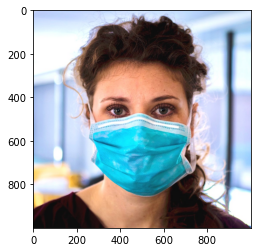

In [35]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [36]:
final_image = cv2.resize(frame,(224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [37]:
Predictions = new_model.predict(final_image) 

In [38]:
Predictions

array([[1.1799877e-12]], dtype=float32)

In [40]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [41]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

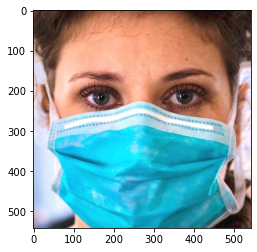

In [43]:
faces = faceCascade.detectMultiScale(gray, 1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    
    plt.imshow(cv2.cvtColor(roi_gray, cv2.COLOR_BGR2RGB))
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0),8)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print('Face not detected')
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex: ex+ew]
            plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))
            
   
        

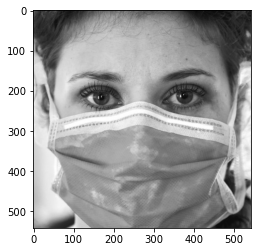

In [44]:
gray=cv2.cvtColor(face_roi,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))



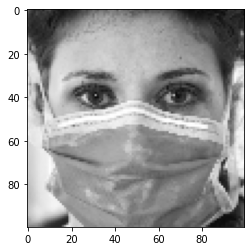

In [45]:
resized=cv2.resize(gray,(100,100))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))


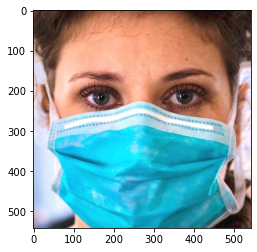

In [46]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [47]:
final_image = cv2.resize(face_roi,(224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [48]:
Predictions = new_model.predict(final_image) 

In [49]:
Predictions

array([[4.001362e-15]], dtype=float32)

In [54]:
import cv2 
path = 'haarcascade_frontalface_default.xml'
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
rectangle_bgr = (255,255,255)
img = np.zeros((500,500))
text = "some text in a box!"
#status = 'No Mask'

(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness=1)[0]


text_offset_x = 10
text_offset_y = img.shape[0] -25

box_coords = ((text_offset_x, text_offset_y),  (text_offset_x + text_width +2, text_offset_y - text_height -2))

cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)

cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)


cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
   # print(frame)
    ret,frame = cap.read()
   # status = 'No Mask'
   # print(frame)
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.3,5)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            pass
       #     print('Face not detected')
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]
  #  cv2.putText(frame, status, (x1 + int(w1/10), y1+int(h1/2)),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
  #  cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2,cv2.LINE_4)
        
    
              
    final_image = cv2.resize(face_roi,(224,224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image/255.0
    
    font = cv2.FONT_HERSHEY_PLAIN
    Predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
   # print(Predictions)
    if(Predictions>0.5):
        
        status = 'No Mask'
        
        x1,y1,w1,h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
        
        cv2.putText(frame, status, (x1 + int(w1/10), y1+int(h1/2)),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    else:
        status = 'Face Mask'
        
        x1,y1,w1,h1 = 0, 0, 175, 75
            
        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
        
        cv2.putText(frame, status, (x1 + int(w1/10), y1+int(h1/2)),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0,255,0), 2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))
    
    
    
    cv2.imshow('FACE MASK DETECTOR', frame)
    
    if cv2.waitKey(2) & 0xff == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
        
    